In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
diabetes_dataset = pd.read_csv('diabetes.csv')
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_dataset.shape

(768, 9)

In [4]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_dataset.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [6]:
diabetes_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
diabetes_dataset.loc[:, ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']][diabetes_dataset.iloc[:, :-1] == 0].count()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [8]:
diabetes_copy = diabetes_dataset.copy()
diabetes_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

In [9]:
diabetes_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

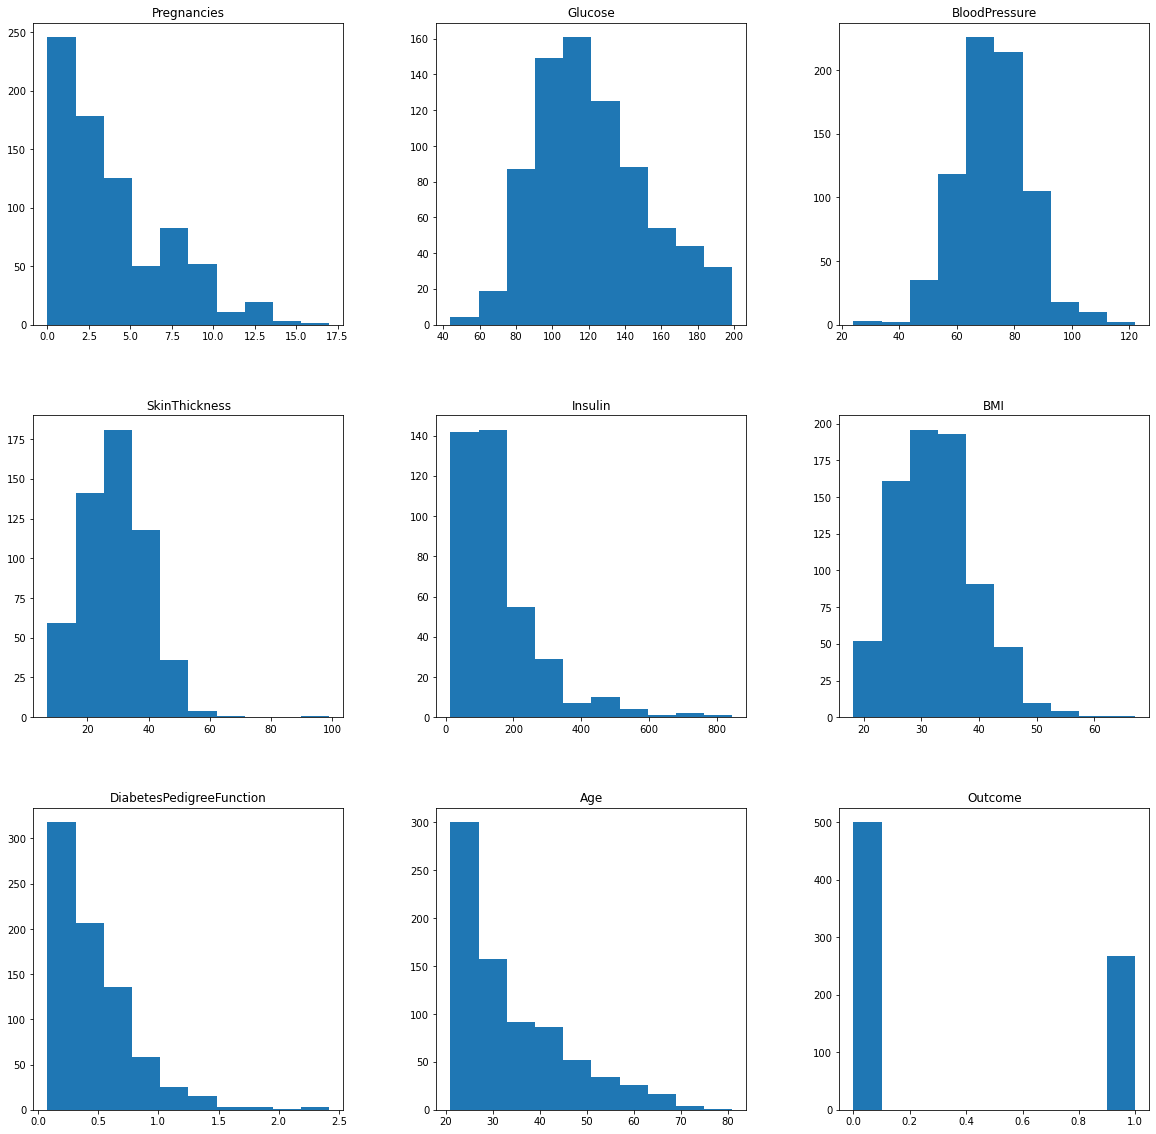

In [10]:
diabetes_copy.hist(figsize=(20, 20), grid=False);


In [11]:
# diabetes_copy['Glucose'].fillna(diabetes_copy['Glucose'].mean(), inplace=True)
# diabetes_copy['BloodPressure'].fillna(diabetes_copy['BloodPressure'].mean(), inplace=True)
# diabetes_copy['SkinThickness'].fillna(diabetes_copy['SkinThickness'].median(), inplace=True)
# diabetes_copy['Insulin'].fillna(diabetes_copy['Insulin'].median(), inplace=True)
# diabetes_copy['BMI'].fillna(diabetes_copy['BMI'].median(), inplace=True)

<AxesSubplot:xlabel='count'>

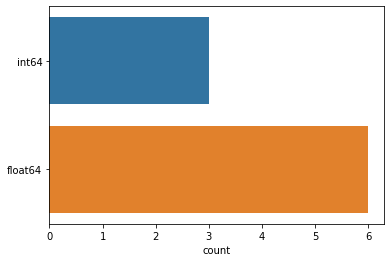

In [12]:
sns.countplot(y=diabetes_copy.dtypes.astype('str'))

In [13]:
diabetes_copy.dtypes.astype('str')

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [14]:
import missingno as msno

<AxesSubplot:>

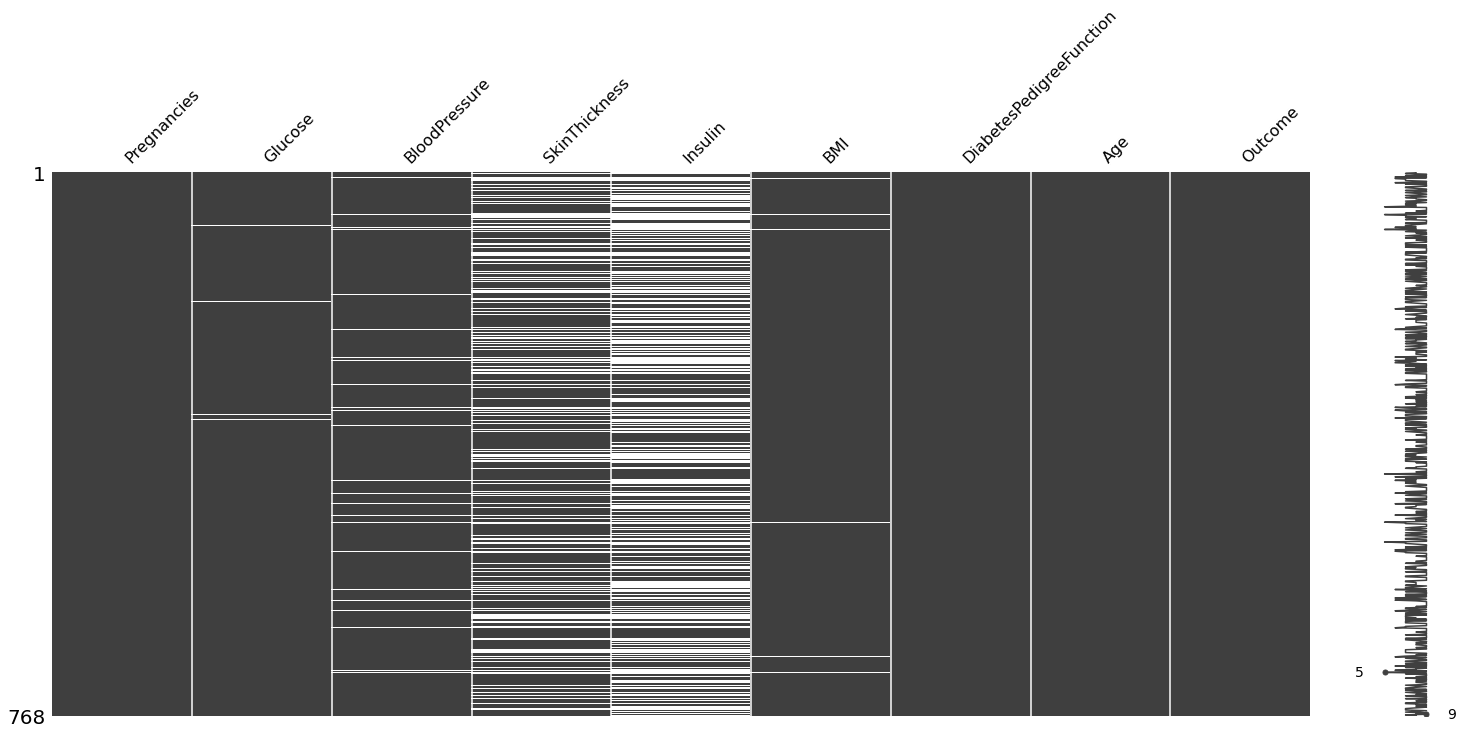

In [15]:
msno.matrix(diabetes_copy)

In [16]:
diabetes_copy[['Insulin', 'SkinThickness']].isnull().sum() / diabetes_copy.shape[0]

Insulin          0.486979
SkinThickness    0.295573
dtype: float64

In [17]:
diabetes_copy.drop(['Insulin'], inplace=True, axis=1)

<AxesSubplot:>

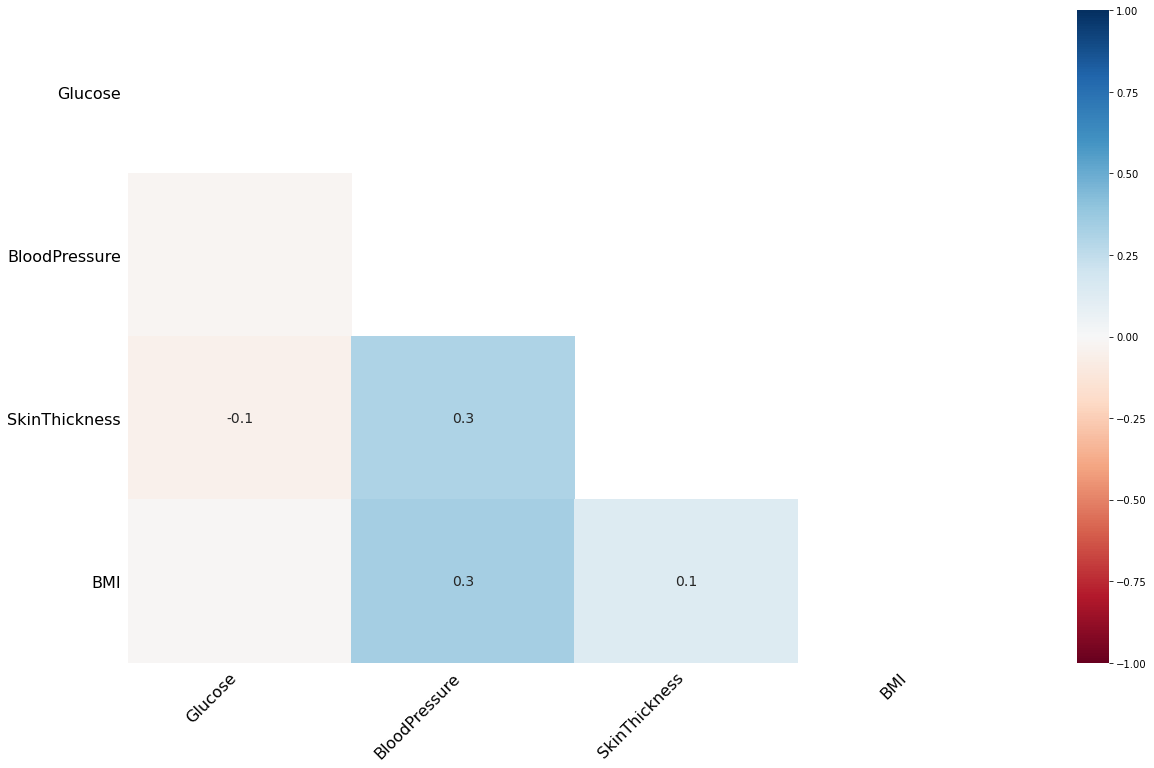

In [18]:
msno.heatmap(diabetes_copy)

Большое положительное значение (1) означает, что если присутствует значение одной переменной, то значение второй также присутствует. Большое отрицательное значение означает, что если значение одной переменной отсутствует, то значение другой присутствует. Значение коэффициента, равное 0, означает, что наличие значений в переменных не взаимосвязаны.

<AxesSubplot:xlabel='Outcome', ylabel='count'>

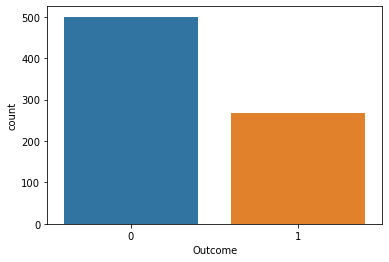

In [19]:
sns.countplot(data=diabetes_copy, x='Outcome')

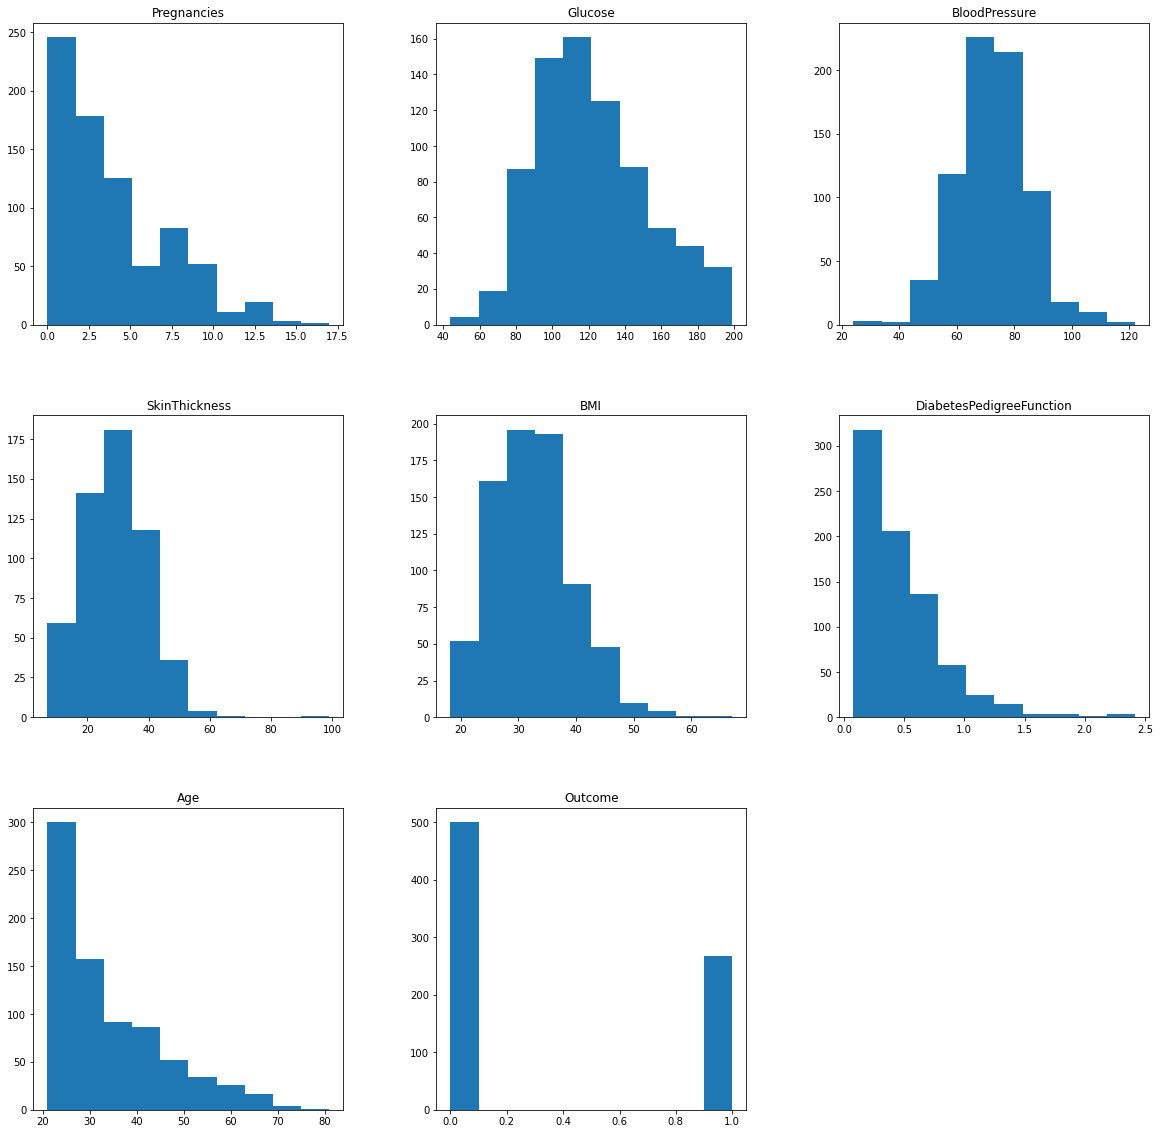

In [20]:
diabetes_copy.hist(grid=False, figsize=(20, 20));

In [21]:
diabetes_copy['SkinThickness'].fillna(diabetes_copy['SkinThickness'].median(), inplace=True)
diabetes_copy['Glucose'].fillna(diabetes_copy['Glucose'].median(), inplace=True)
diabetes_copy['BloodPressure'].fillna(diabetes_copy['BloodPressure'].mean(), inplace=True)
diabetes_copy['BMI'].fillna(diabetes_copy['BMI'].median(), inplace=True)


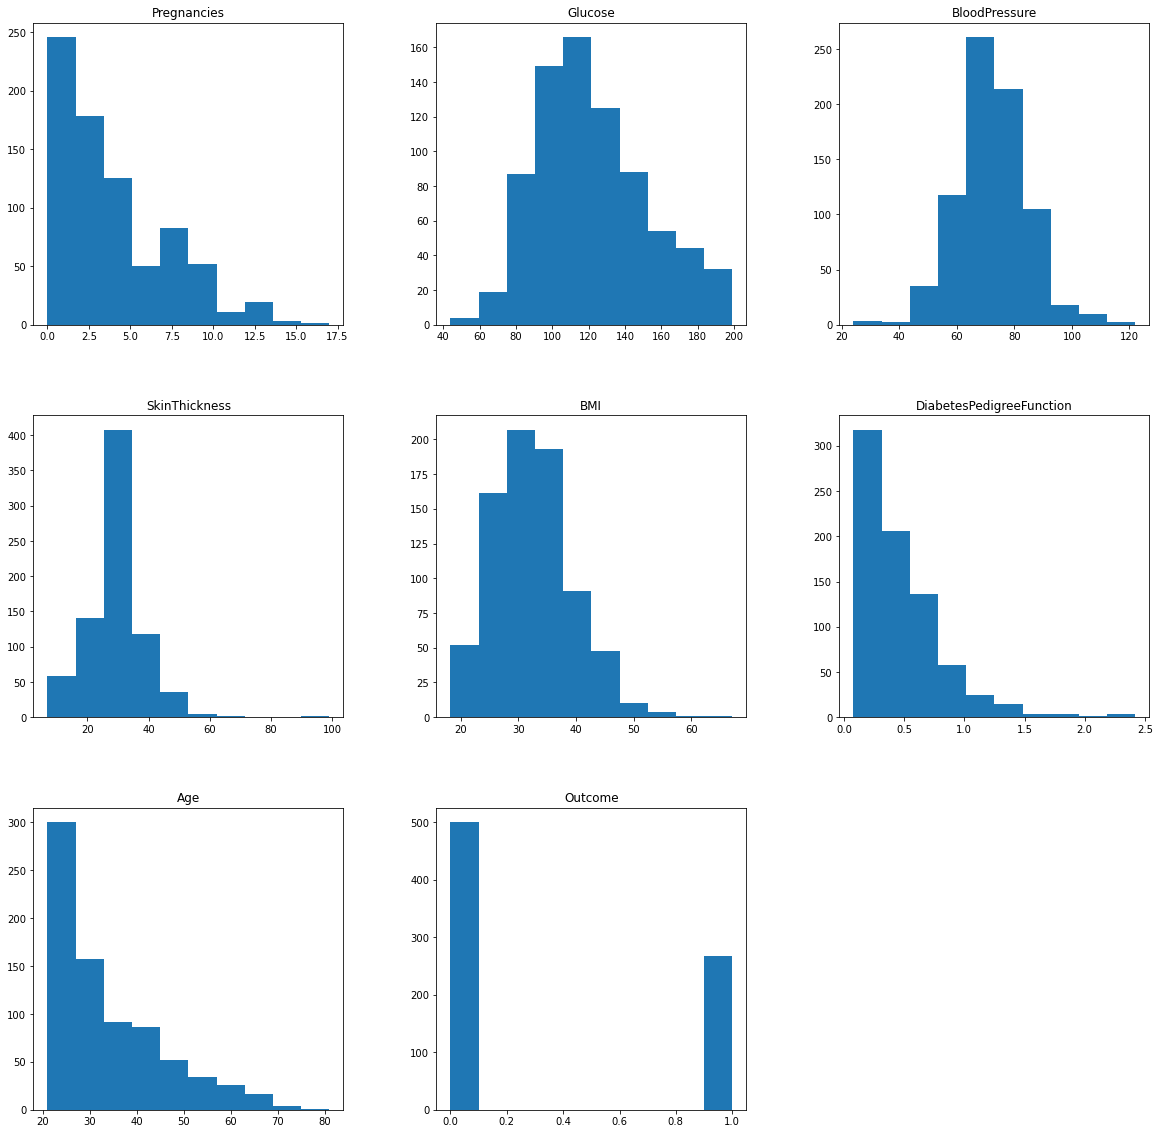

In [22]:
diabetes_copy.hist(grid=False, figsize=(20, 20));

<AxesSubplot:>

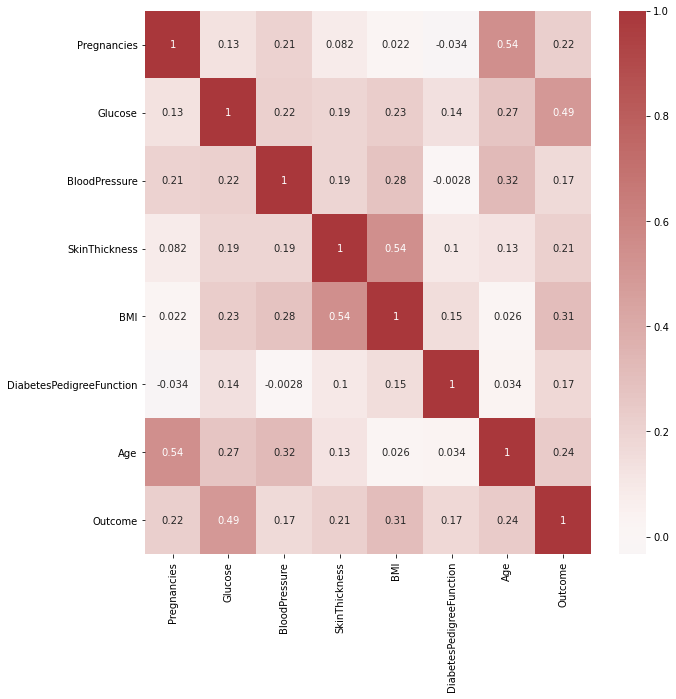

In [23]:
plt.figure(figsize=(10, 10))
sns.heatmap(diabetes_copy.corr(), annot=True, cmap='vlag', center=0)

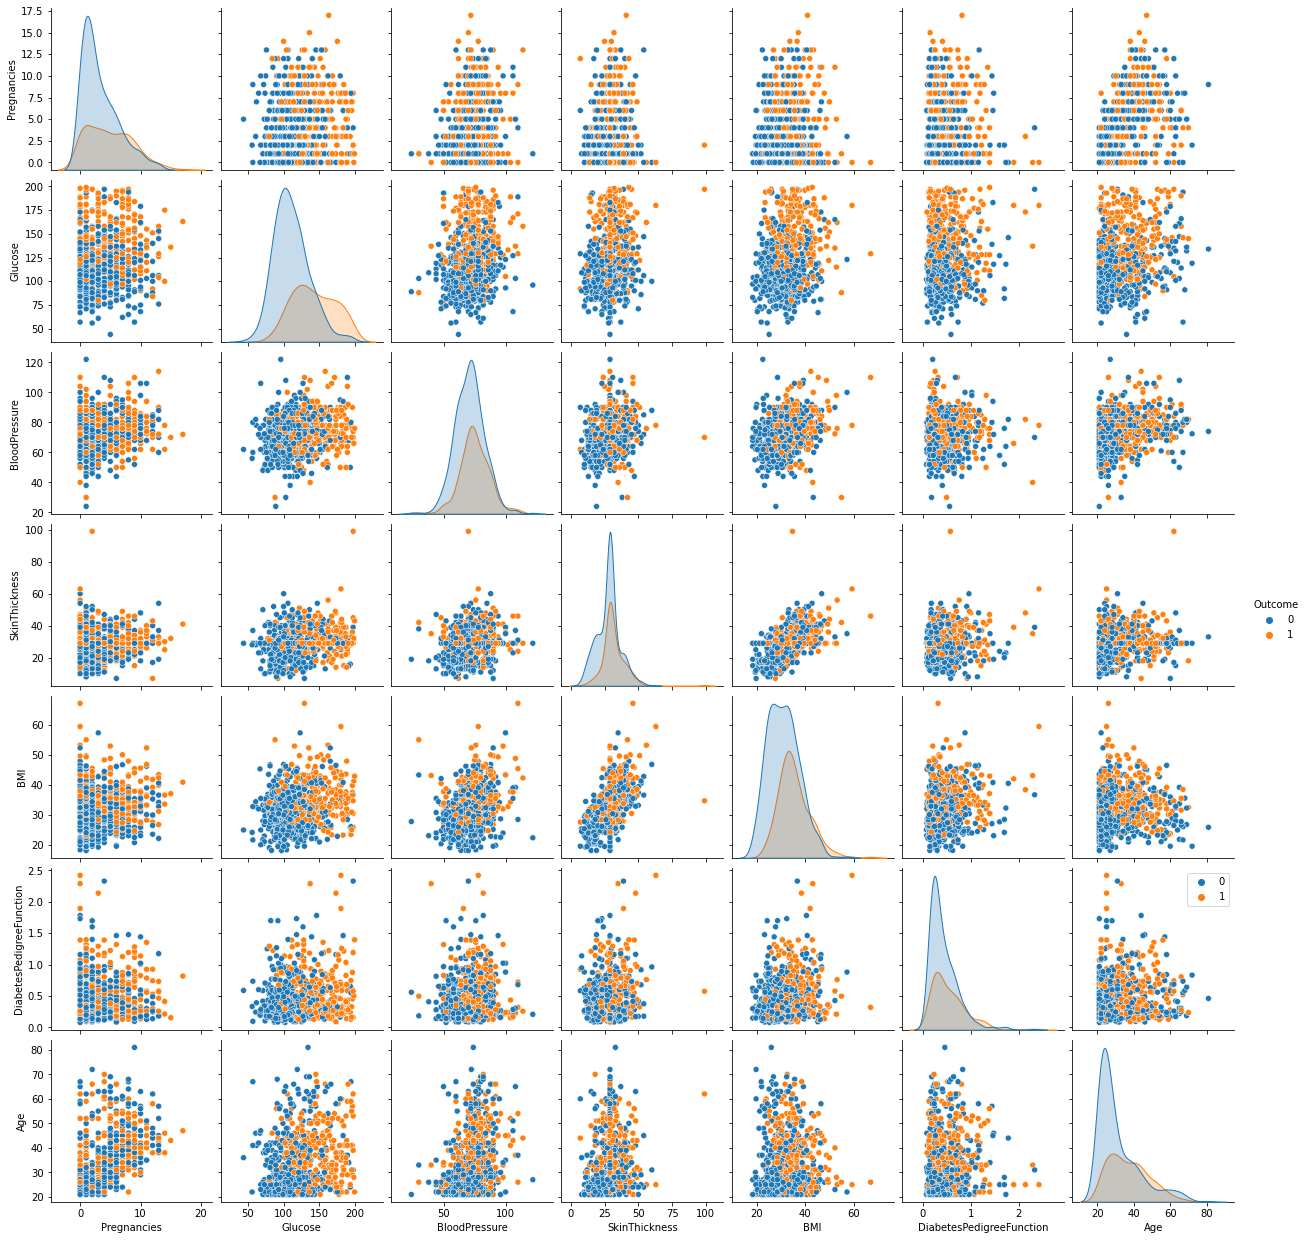

In [24]:
sns.pairplot(diabetes_copy, hue='Outcome')
plt.legend()

In [25]:
from sklearn import model_selection, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [137]:
X = diabetes_copy.drop(['Outcome'], axis=1)
y = diabetes_copy['Outcome']

In [138]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [139]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

In [140]:
pipe = Pipeline(steps=[('scaler', scaler), ('knn', knn)])

In [141]:
cv = model_selection.cross_val_score(pipe, X_train, y_train, scoring='f1', cv=5)
cv.mean()

0.5582263875027352

In [142]:
params = {'knn__n_neighbors': np.arange(1, 21)}

In [144]:
gsv = model_selection.GridSearchCV(pipe, params, cv=5, scoring='f1')
gsv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring='f1')

In [145]:
gsv.best_score_

0.5774166597259817

In [148]:
metrics.f1_score(gsv.best_estimator_.predict(X_test), y_test)

0.60431654676259

# Oversampling

In [150]:
X_oversampled = X.loc[np.random.choice(X[y == 1].index.to_list(), size=(y == 0).sum() - (y == 1).sum())]

In [151]:
X_full_oversampled = X.append(X_oversampled)

In [152]:
y_oversampled = y.append(pd.Series(np.ones(X_oversampled.shape[0])))

In [153]:
X_full_oversampled.shape, y_oversampled.shape

((1000, 7), (1000,))

In [154]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_full_oversampled, y_oversampled, 
                                                                   test_size=0.3, shuffle=True, random_state=42)

In [155]:
cv = model_selection.cross_val_score(pipe, X_train, y_train, cv=5, scoring='f1')
cv.mean()

0.7469623695356793

In [164]:
params = {'knn__n_neighbors': np.arange(2, 16)}

In [165]:
gscv = model_selection.GridSearchCV(pipe, params, scoring='f1', cv=5)
gscv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
             scoring='f1')

In [166]:
gscv.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=7))])

In [169]:
predictions = gscv.best_estimator_.predict(X_test)
metrics.f1_score(y_test, predictions)

0.7696969696969698